<a href="https://colab.research.google.com/github/premkumar25/Cat-Dog-Image-Classification/blob/main/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import files from kaggle directly without downloading it.

Follow the below steps

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"iampremkumar","key":"5b6d5eb9abe6136b409aedb839224451"}'}

kaggle.json file can be downloaded from kaggle website
Note: This file may vary for each user and download your own file from your kaggle account

In [8]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json


!kaggle datasets download -d chetankv/dogs-cats-images


kaggle.json
 98% 425M/435M [00:04<00:00, 81.3MB/s]
100% 435M/435M [00:04<00:00, 92.5MB/s]


Dataset downloaded

## Extract the files downloaded

In [12]:
import zipfile
a=zipfile.ZipFile('/content/dogs-cats-images.zip')
a.extractall()
a.close()

## Import Libraries

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagenerator = ImageDataGenerator(rescale=1./255)
train_data = train_datagenerator.flow_from_directory('dataset/training_set',
                                                      target_size = (64, 64),
                                                      batch_size = 32,
                                                      class_mode = 'binary')

test_datagenerator = ImageDataGenerator(rescale=1./255)
test_data = test_datagenerator.flow_from_directory('dataset/test_set',
                                                      target_size = (64, 64),
                                                      batch_size = 32,
                                                      class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

### Complie and fit the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = train_data, validation_data = test_data, epochs = 10)

Epoch 1/10
250/250 [==============================] - 56s 93ms/step - loss: 0.6975 - accuracy: 0.5414 - val_loss: 0.5844 - val_accuracy: 0.6925
Epoch 2/10
250/250 [==============================] - 23s 91ms/step - loss: 0.5559 - accuracy: 0.7251 - val_loss: 0.5504 - val_accuracy: 0.7255
Epoch 3/10
250/250 [==============================] - 23s 92ms/step - loss: 0.4760 - accuracy: 0.7656 - val_loss: 0.5080 - val_accuracy: 0.7565
Epoch 4/10
250/250 [==============================] - 23s 91ms/step - loss: 0.4171 - accuracy: 0.8116 - val_loss: 0.4930 - val_accuracy: 0.7755
Epoch 5/10
250/250 [==============================] - 23s 91ms/step - loss: 0.3602 - accuracy: 0.8343 - val_loss: 0.5052 - val_accuracy: 0.7675
Epoch 6/10
250/250 [==============================] - 23s 91ms/step - loss: 0.3205 - accuracy: 0.8645 - val_loss: 0.5167 - val_accuracy: 0.7735
Epoch 7/10
250/250 [==============================] - 23s 92ms/step - loss: 0.2406 - accuracy: 0.9046 - val_loss: 0.5519 - val_accuracy:

### Predict new images

In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
test_img = image.load_img('dog_test.jpg', target_size=(64,64))
test_img = image.img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis=0)
result = cnn.predict(test_img)

In [ ]:
result
if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog


In [ ]:
test_img = image.load_img('cat_test1.jpg', target_size=(64,64))
test_img = image.img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis=0)
result = cnn.predict(test_img)
result

array([[0.8736933]], dtype=float32)

In [ ]:
if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat


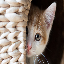

In [3]:
test_img = image.load_img('cat_test.jpg', target_size=(64,64))
test_img